##chh-OLA

Importing Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn-dark")
plt.rcParams['figure.figsize'] = 11.7,8.27
sns.set(rc={'figure.figsize':(11.7,8.27)})
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Importing Dataset

In [2]:
url='https://raw.githubusercontent.com/roopbiswas/chh-ola/master/train.csv?token=AIEZ6SC64IRPDGBKL5QC4VK5QQWRM'
df=pd.read_csv(url,encoding='utf7')
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,4,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount
0,0,1,170.000,233.000,1.83,0.5,0.700,04/04/2017 05:59:43 PM,04/04/2017 06:05:04 PM,1.000,0.000,1.000,1.000,N,1,0.3,9.13
1,1,2,151.000,243.000,3.56,0.5,4.640,04/03/2017 07:03:34 PM,04/03/2017 07:20:04 PM,1.000,0.000,1.000,1.000,N,1,0.3,21.36
2,2,2,68.000,90.000,1.5,0.5,1.290,04/03/2017 03:06:13 PM,04/03/2017 03:12:30 PM,2.000,0.000,1.000,1.000,N,0,0.3,8.8
3,3,2,142.000,234.000,1.5,0.5,2.740,04/04/2017 08:10:52 AM,04/04/2017 08:27:00 AM,1.000,0.000,1.000,1.000,N,0,0.3,14.8
4,4,2,238.000,238.000,0,0.5,0.450,04/05/2017 02:02:59 PM,04/05/2017 02:05:41 PM,6.000,0.000,2.000,1.000,N,0,0.3,4.8


Encoding attribute 'stored_flag' and checking info (which includes number of attributes, their datatypes, number of datapoints etc.)

In [3]:
df['stored_flag'] = df['stored_flag'].apply(lambda x: 0 if x=='N' else 1)
df_mod = df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
ID                    1048575 non-null int64
vendor_id             1048575 non-null object
pickup_loc            1048574 non-null float64
drop_loc              1048574 non-null float64
driver_tip            1048573 non-null object
mta_tax               1048574 non-null object
distance              1048574 non-null float64
pickup_time           1048574 non-null object
drop_time             1048574 non-null object
num_passengers        1048574 non-null float64
toll_amount           1048573 non-null object
payment_method        1048574 non-null float64
rate_code             1048574 non-null float64
stored_flag           1048575 non-null int64
extra_charges         1048574 non-null object
improvement_charge    1048573 non-null object
total_amount          1048573 non-null object
dtypes: float64(6), int64(2), object(9)
memory usage: 136.0+ MB


Getting an overview of the data .

In [0]:
df.describe()

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount
count,1048573.000,1048573.000,1048573.000,1048573.000,1048573.000,1048573.000,1048573.000,1048573.000,1048573.000,1048573.000,1048573.000,1048573.000,1048573.000,1048573.000,1048573.000
mean,524287.352,0.300,164.808,162.668,1.895,0.497,2.860,1.591,0.346,1.318,1.043,0.007,0.341,0.300,16.218
std,302697.642,0.014,65.793,69.531,2.654,0.042,3.710,1.254,2.138,0.485,0.562,0.082,0.484,0.014,15.096
min,0.000,-0.300,1.000,1.000,-10.090,-0.500,0.000,0.000,-5.760,1.000,1.000,0.000,-4.500,-0.300,-260.800
25%,262144.000,0.300,125.000,113.000,0.000,0.500,0.930,1.000,0.000,1.000,1.000,0.000,0.000,0.300,8.500
50%,524287.000,0.300,162.000,162.000,1.450,0.500,1.600,1.000,0.000,1.000,1.000,0.000,0.000,0.300,11.760
75%,786431.000,0.300,233.000,233.000,2.450,0.500,2.900,2.000,0.000,2.000,1.000,0.000,0.500,0.300,17.750
max,1048574.000,0.300,265.000,265.000,400.000,0.500,113.800,9.000,905.760,4.000,99.000,1.000,6.500,0.300,2759.370


In [4]:
df.isnull().sum()

ID                    0
vendor_id             0
pickup_loc            1
drop_loc              1
driver_tip            2
mta_tax               1
distance              1
pickup_time           1
drop_time             1
num_passengers        1
toll_amount           2
payment_method        1
rate_code             1
stored_flag           0
extra_charges         1
improvement_charge    2
total_amount          2
dtype: int64



We find that NULL values are less in number, so finding all NULL values and removing them.


In [5]:
df.dropna(axis=0,inplace=True)
df.dtypes

ID                      int64
vendor_id              object
pickup_loc            float64
drop_loc              float64
driver_tip             object
mta_tax                object
distance              float64
pickup_time            object
drop_time              object
num_passengers        float64
toll_amount            object
payment_method        float64
rate_code             float64
stored_flag             int64
extra_charges          object
improvement_charge     object
total_amount           object
dtype: object

Changing datatype error caused due to NULL values.

In [6]:
df['total_amount'] = df['total_amount'].astype(float)
df['driver_tip'] = df['driver_tip'].astype(float)
df['mta_tax'] = df['mta_tax'].astype(float)
df['pickup_loc'] = df['pickup_loc'].astype(int)
df['toll_amount'] = df['toll_amount'].astype(float)
df['extra_charges'] = df['extra_charges'].astype(float)
df['improvement_charge'] = df['improvement_charge'].astype(float)
df['vendor_id'] = df['improvement_charge'].astype(float)
df.head()

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount
0,0,0.300,170,233.000,1.830,0.500,0.700,04/04/2017 05:59:43 PM,04/04/2017 06:05:04 PM,1.000,0.000,1.000,1.000,0,1.000,0.300,9.130
1,1,0.300,151,243.000,3.560,0.500,4.640,04/03/2017 07:03:34 PM,04/03/2017 07:20:04 PM,1.000,0.000,1.000,1.000,0,1.000,0.300,21.360
2,2,0.300,68,90.000,1.500,0.500,1.290,04/03/2017 03:06:13 PM,04/03/2017 03:12:30 PM,2.000,0.000,1.000,1.000,0,0.000,0.300,8.800
3,3,0.300,142,234.000,1.500,0.500,2.740,04/04/2017 08:10:52 AM,04/04/2017 08:27:00 AM,1.000,0.000,1.000,1.000,0,0.000,0.300,14.800
4,4,0.300,238,238.000,0.000,0.500,0.450,04/05/2017 02:02:59 PM,04/05/2017 02:05:41 PM,6.000,0.000,2.000,1.000,0,0.000,0.300,4.800


In [7]:
df.dtypes

ID                      int64
vendor_id             float64
pickup_loc              int64
drop_loc              float64
driver_tip            float64
mta_tax               float64
distance              float64
pickup_time            object
drop_time              object
num_passengers        float64
toll_amount           float64
payment_method        float64
rate_code             float64
stored_flag             int64
extra_charges         float64
improvement_charge    float64
total_amount          float64
dtype: object

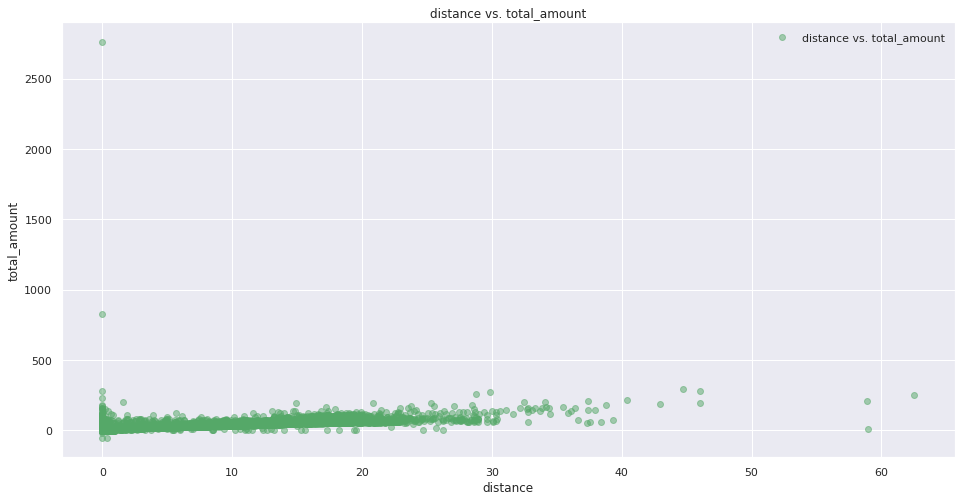

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount
count,1048573.000,1048573.000,1048573.000,1048573.000,1048573.000,1048573.000,1048573.000,1048573.000,1048573.000,1048573.000,1048573.000,1048573.000,1048573.000,1048573.000,1048573.000
mean,524287.352,0.300,164.808,162.668,1.895,0.497,2.860,1.591,0.346,1.318,1.043,0.007,0.341,0.300,16.218
std,302697.642,0.014,65.793,69.531,2.654,0.042,3.710,1.254,2.138,0.485,0.562,0.082,0.484,0.014,15.096
min,0.000,-0.300,1.000,1.000,-10.090,-0.500,0.000,0.000,-5.760,1.000,1.000,0.000,-4.500,-0.300,-260.800
25%,262144.000,0.300,125.000,113.000,0.000,0.500,0.930,1.000,0.000,1.000,1.000,0.000,0.000,0.300,8.500
50%,524287.000,0.300,162.000,162.000,1.450,0.500,1.600,1.000,0.000,1.000,1.000,0.000,0.000,0.300,11.760
75%,786431.000,0.300,233.000,233.000,2.450,0.500,2.900,2.000,0.000,2.000,1.000,0.000,0.500,0.300,17.750
max,1048574.000,0.300,265.000,265.000,400.000,0.500,113.800,9.000,905.760,4.000,99.000,1.000,6.500,0.300,2759.370


In [8]:
def plot_scatter(x,y,label,x_label,y_label):
  plt.figure(figsize=(16,8))
  plt.scatter(x, y, c="g", alpha=0.5, label=label)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend(loc='upper right')
  plt.title(label)
  # plt.xticks(np.arange(0, 1, step=0.2))
  plt.show()
plot_scatter(df['distance'][:100000],df['total_amount'][:100000],"distance vs. total_amount","distance","total_amount")
df.describe()

In [9]:
print(f"There are {len(df[df['total_amount'] < 0])} negative entries of total_amount.")
print(f"There are {len(df[df['total_amount'] == 0])} 0 entries of total_amount.")
print(f"There are {len(df[df['total_amount'] > 600])} entries of total_amount greater than 600.")
print(f"There are {len(df[df['vendor_id'] < 0])} negative entries of vendor_id.")
print(f"There are {len(df[df['driver_tip'] < 0])} negative entries of driver_tip.")
print(f"There are {len(df[df['mta_tax'] < 0])} negative entries of mta_tax.")

There are 521 negative entries of total_amount.
There are 203 0 entries of total_amount.
There are 9 entries of total_amount greater than 600.
There are 521 negative entries of vendor_id.
There are 12 negative entries of driver_tip.
There are 505 negative entries of mta_tax.


## *The above plots along with values from describe show that there are outlier and meaningless points which are very less in number..*



*   Neglecting negative values from amounts (removing outliers of total_amount corrects other attributes)
*   Assuming 600 to be the upper cap of fare
*   total_amount varies almost linearly with distance.



In [10]:
df=df[df['total_amount'].between(left=0.1,right=600)]
# df=df[df['vendor_id']>=0]
# df=df[df['toll_amount']>=0]
# df=df[df['mta_tax']>=0]
# df=df[df['driver_tip']>=0]
# df=df[df['improvement_charge']>=0]
# df=df[df['extra_charges']>=0]
df.describe()

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount
count,1047838.000,1047838.000,1047838.000,1047838.000,1047838.000,1047838.000,1047838.000,1047838.000,1047838.000,1047838.000,1047838.000,1047838.000,1047838.000,1047838.000,1047838.000
mean,524269.735,0.300,164.806,162.662,1.897,0.498,2.862,1.591,0.344,1.317,1.043,0.007,0.342,0.300,16.222
std,302686.492,0.003,65.790,69.531,2.654,0.035,3.710,1.254,1.709,0.483,0.510,0.082,0.484,0.003,14.225
min,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.300
25%,262140.250,0.300,125.000,113.000,0.000,0.500,0.930,1.000,0.000,1.000,1.000,0.000,0.000,0.300,8.500
50%,524262.500,0.300,162.000,162.000,1.450,0.500,1.600,1.000,0.000,1.000,1.000,0.000,0.000,0.300,11.760
75%,786393.750,0.300,233.000,233.000,2.450,0.500,2.900,2.000,0.000,2.000,1.000,0.000,0.500,0.300,17.750
max,1048574.000,0.300,265.000,265.000,400.000,0.500,113.800,9.000,571.320,4.000,99.000,1.000,6.500,0.300,598.120


## Visualizing the data..

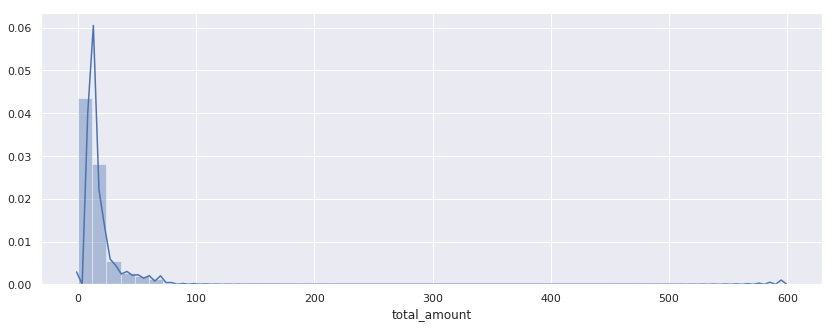

In [11]:
plt.figure(figsize=(14,5))
sns.distplot(df['total_amount'])

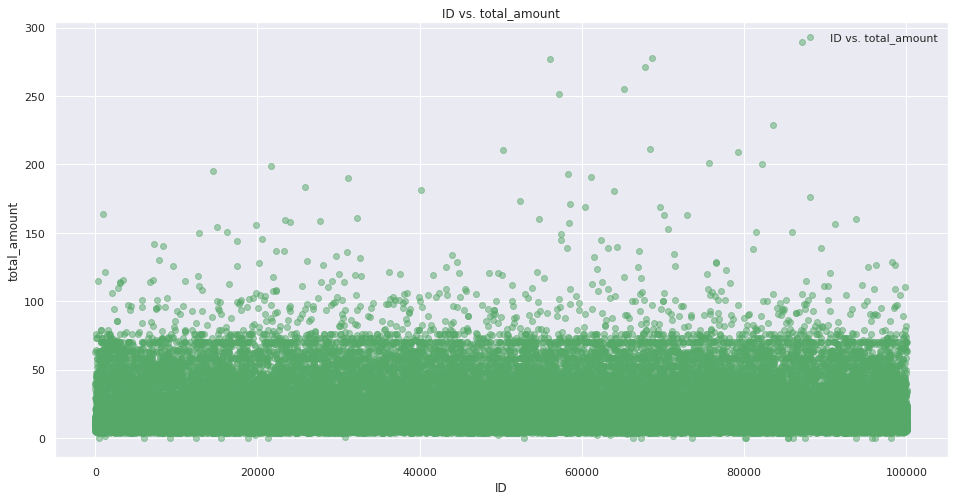

In [12]:
plot_scatter(df["ID"][:100000],df["total_amount"][:100000],"ID vs. total_amount","ID","total_amount")

The graph shows that ID is unrelated to the total_amount.

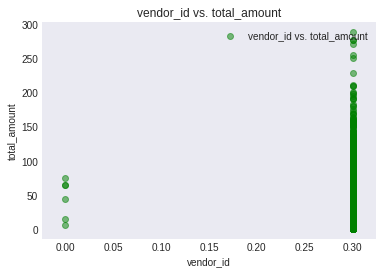

<Figure size 1440x720 with 0 Axes>

In [0]:
plot_scatter(df["vendor_id"][:100000],df["total_amount"][:100000],"vendor_id vs. total_amount","vendor_id","total_amount")

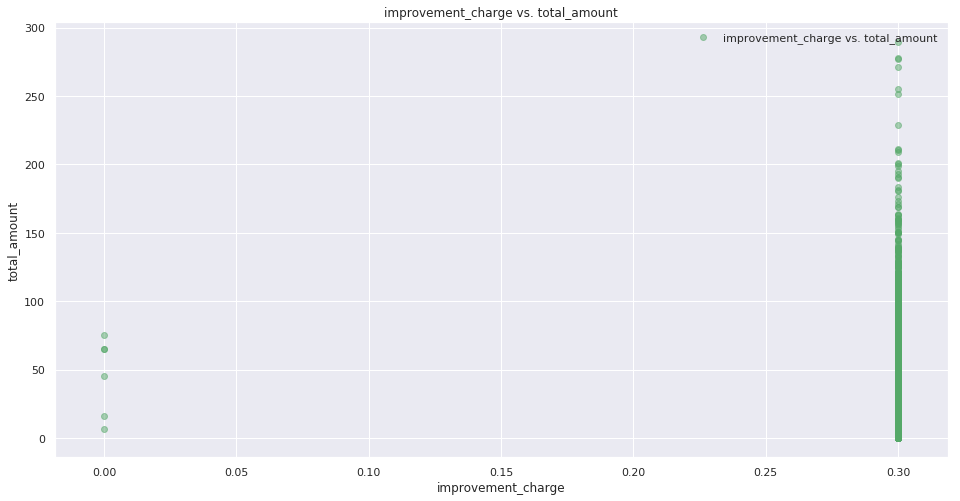

In [0]:
plot_scatter(df["improvement_charge"][:100000],df["total_amount"][:100000],"improvement_charge vs. total_amount","improvement_charge","total_amount")

The above 2 plots show that for a certain values, the count of which is very less, the fare amount is 0 whereas for others it shows normal variation. This may indicate that these are redundant features.

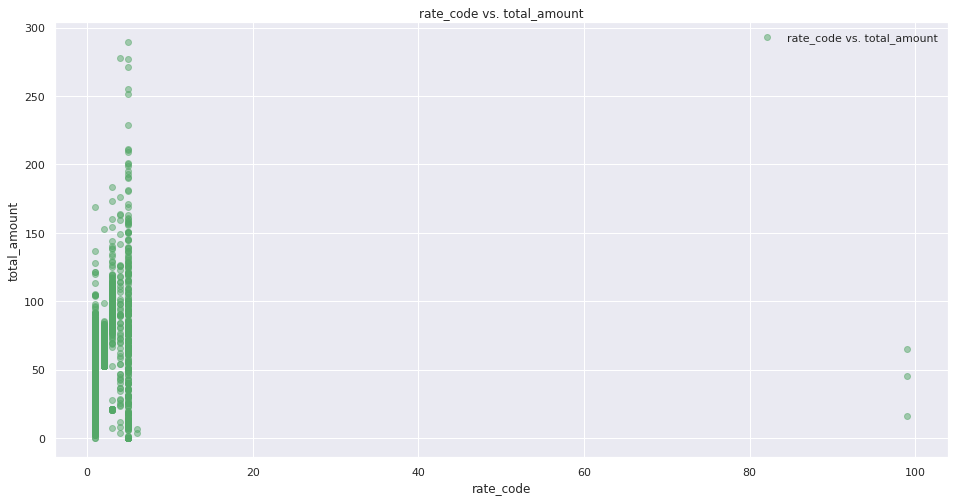

In [0]:
plot_scatter(df["rate_code"][:100000],df["total_amount"][:100000],"rate_code vs. total_amount","rate_code","total_amount")

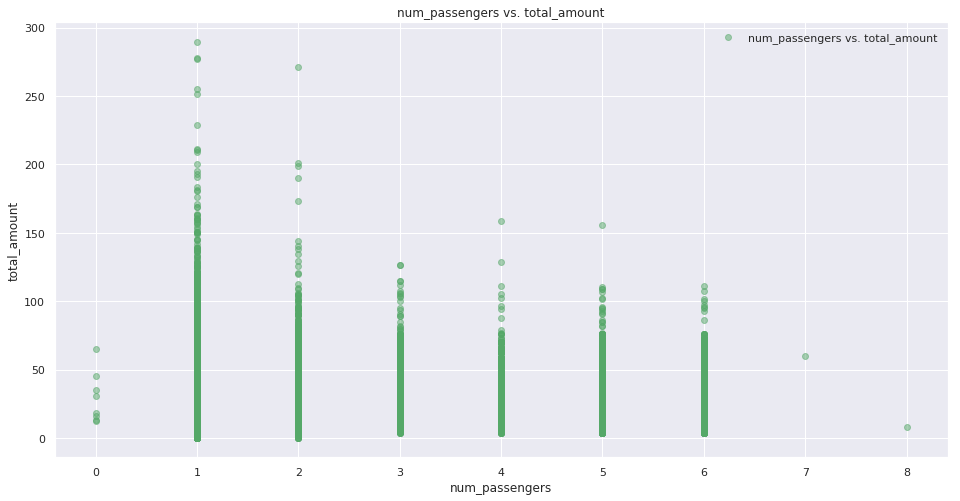

In [0]:
plot_scatter(df["num_passengers"][:100000],df["total_amount"][:100000],"num_passengers vs. total_amount","num_passengers","total_amount")

In [0]:
def plot_cat(x,y,label):
  plt.figure(figsize=(20,8))
  sns.catplot(x=x, y=y, data=df[:100000], height=7, aspect=11/7)
  plt.xlabel(x)
  plt.ylabel(y)
  plt.legend(loc='upper right')
  plt.title(label)
  # plt.xticks(np.arange(0, 1, step=0.2))
  plt.show()

No handles with labels found to put in legend.


<Figure size 1440x576 with 0 Axes>

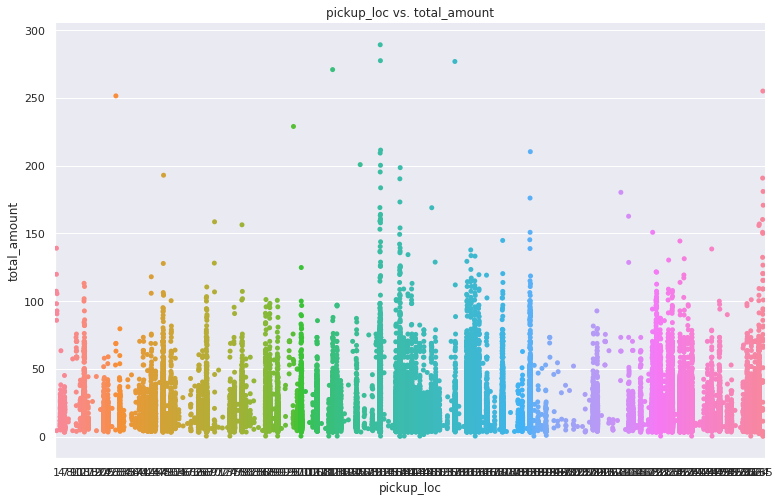

In [0]:
plot_cat("pickup_loc","total_amount","pickup_loc vs. total_amount")

This plot shows unusually high value of fare for certain pickup locations which is analogous to real world locations of malls, airports, stations etc. 

No handles with labels found to put in legend.


<Figure size 1440x576 with 0 Axes>

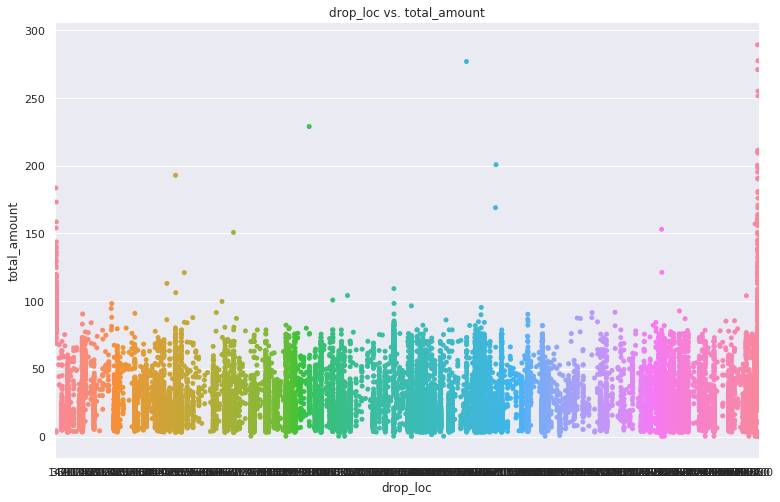

In [0]:
plot_cat("drop_loc","total_amount","drop_loc vs. total_amount")

The plot , unlike the previous plot shows a few substatial values at the left and right points.

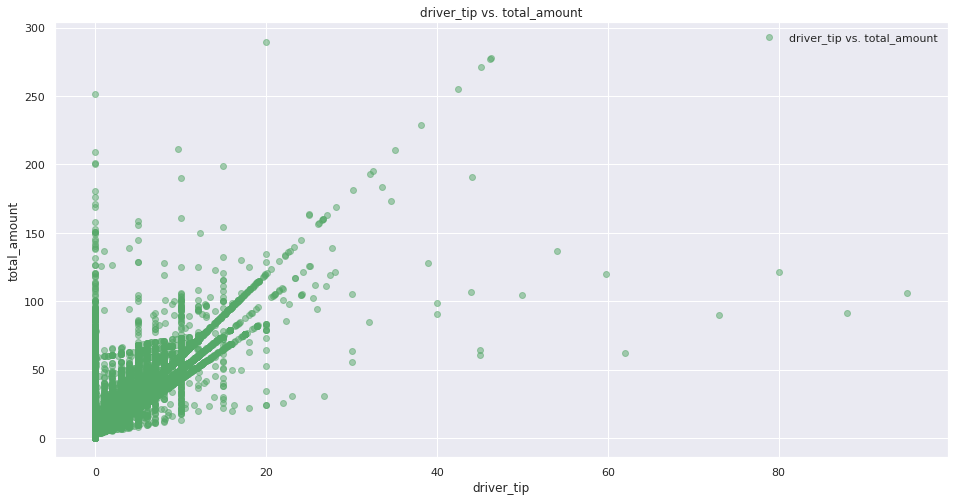

In [0]:
plot_scatter(df["driver_tip"][:100000],df["total_amount"][:100000],"driver_tip vs. total_amount","driver_tip","total_amount")

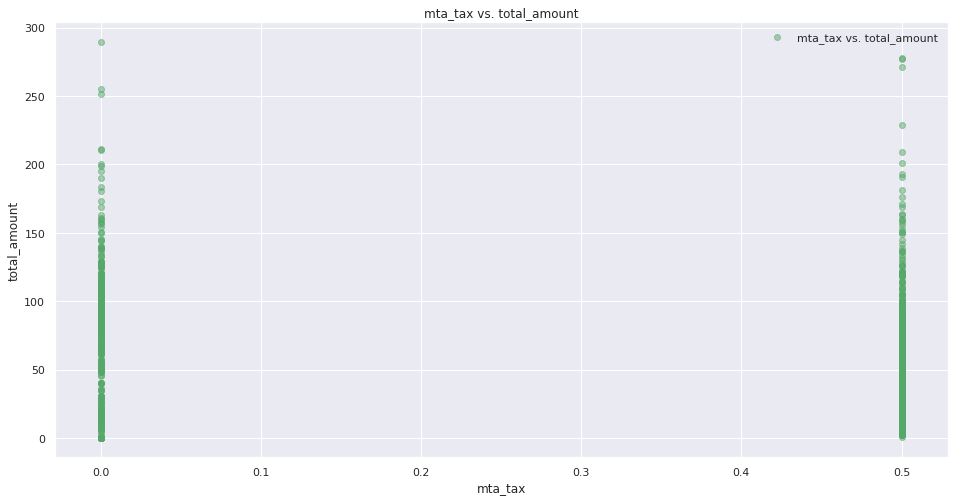

In [0]:
plot_scatter(df["mta_tax"][:100000],df["total_amount"][:100000],"mta_tax vs. total_amount","mta_tax","total_amount")

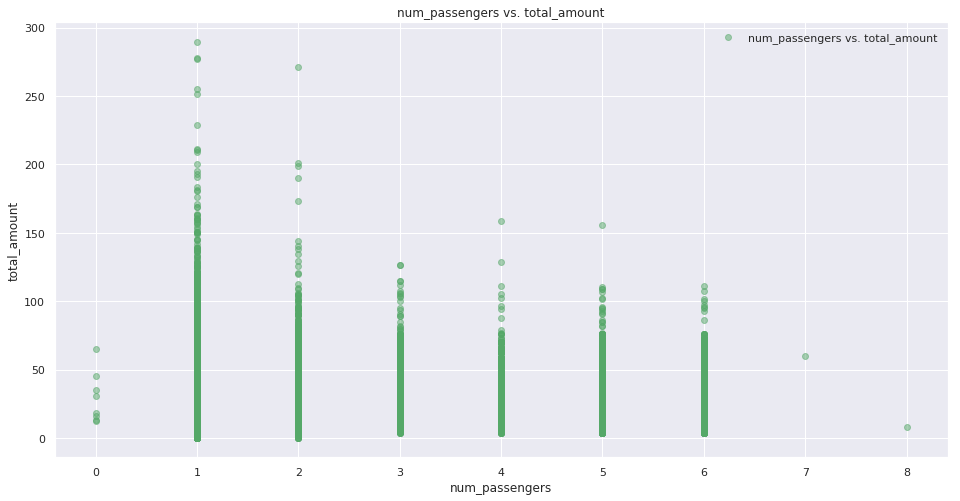

In [0]:
plot_scatter(df["num_passengers"][:100000],df["total_amount"][:100000],"num_passengers vs. total_amount","num_passengers","total_amount")

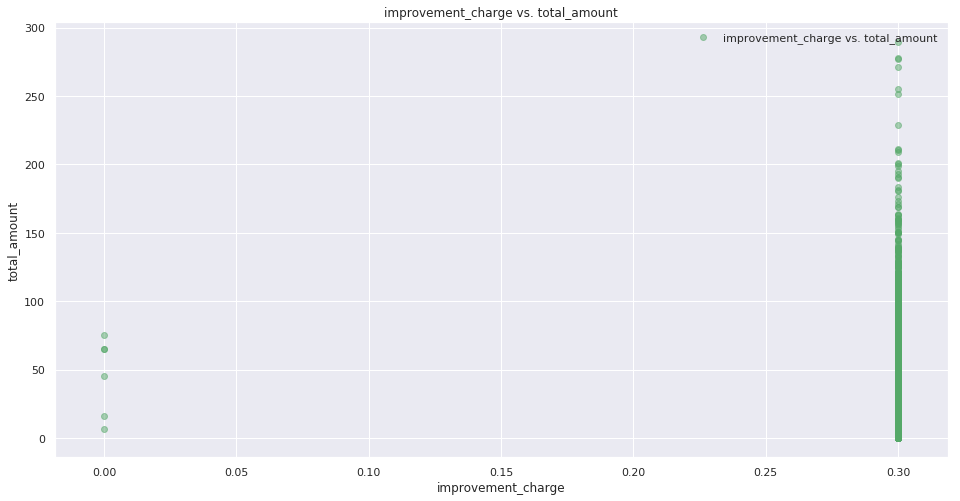

### Adding some new features.

In [15]:
df['pickup_time'] = pd.to_datetime(df['pickup_time'])
df['drop_time'] = pd.to_datetime(df['drop_time'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
df['day_of_week'] = df['pickup_time'].dt.dayofweek
df['hour'] = df['pickup_time'].dt.hour
df.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount,day_of_week,hour
count,1047838.000,1047838.000,1047838.000,1047838.000,1047838.000,1047838.000,1047838.000,1047838.000,1047838.000,1047838.000,1047838.000,1047838.000,1047838.000,1047838.000,1047838.000,1047838.000,1047838.000
mean,524269.735,0.300,164.806,162.662,1.897,0.498,2.862,1.591,0.344,1.317,1.043,0.007,0.342,0.300,16.222,1.957,13.609
std,302686.492,0.003,65.790,69.531,2.654,0.035,3.710,1.254,1.709,0.483,0.510,0.082,0.484,0.003,14.225,1.361,5.806
min,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.300,0.000,0.000
25%,262140.250,0.300,125.000,113.000,0.000,0.500,0.930,1.000,0.000,1.000,1.000,0.000,0.000,0.300,8.500,1.000,9.000
50%,524262.500,0.300,162.000,162.000,1.450,0.500,1.600,1.000,0.000,1.000,1.000,0.000,0.000,0.300,11.760,2.000,14.000
75%,786393.750,0.300,233.000,233.000,2.450,0.500,2.900,2.000,0.000,2.000,1.000,0.000,0.500,0.300,17.750,3.000,19.000
max,1048574.000,0.300,265.000,265.000,400.000,0.500,113.800,9.000,571.320,4.000,99.000,1.000,6.500,0.300,598.120,6.000,23.000


In [17]:
df['month'] = df['pickup_time'].dt.month
df['day'] = df['pickup_time'].dt.day

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
df['travel_time'] = [ z.total_seconds() for z in (df['drop_time'] - df['pickup_time'])]
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount,day_of_week,hour,month,day,travel_time
0,0,0.300,170,233.000,1.830,0.500,0.700,2017-04-04 17:59:43,2017-04-04 18:05:04,1.000,0.000,1.000,1.000,0,1.000,0.300,9.130,1,17,4,4,321.000
1,1,0.300,151,243.000,3.560,0.500,4.640,2017-04-03 19:03:34,2017-04-03 19:20:04,1.000,0.000,1.000,1.000,0,1.000,0.300,21.360,0,19,4,3,990.000
2,2,0.300,68,90.000,1.500,0.500,1.290,2017-04-03 15:06:13,2017-04-03 15:12:30,2.000,0.000,1.000,1.000,0,0.000,0.300,8.800,0,15,4,3,377.000
3,3,0.300,142,234.000,1.500,0.500,2.740,2017-04-04 08:10:52,2017-04-04 08:27:00,1.000,0.000,1.000,1.000,0,0.000,0.300,14.800,1,8,4,4,968.000
4,4,0.300,238,238.000,0.000,0.500,0.450,2017-04-05 14:02:59,2017-04-05 14:05:41,6.000,0.000,2.000,1.000,0,0.000,0.300,4.800,2,14,4,5,162.000


Plotting the newly created features to get their relevance.

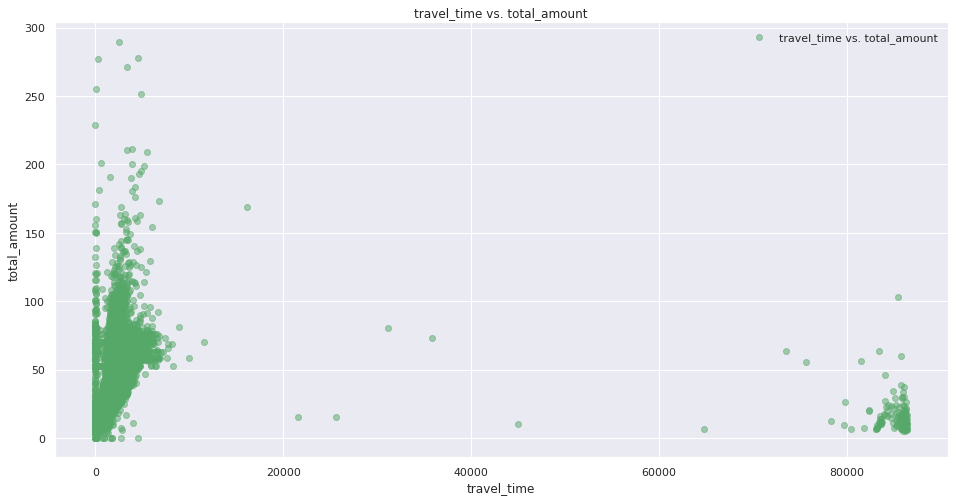

In [0]:
plot_scatter(df["travel_time"][:100000],df["total_amount"][:100000],"travel_time vs. total_amount","travel_time","total_amount")

KeyboardInterrupt: ignored

<Figure size 1440x576 with 0 Axes>

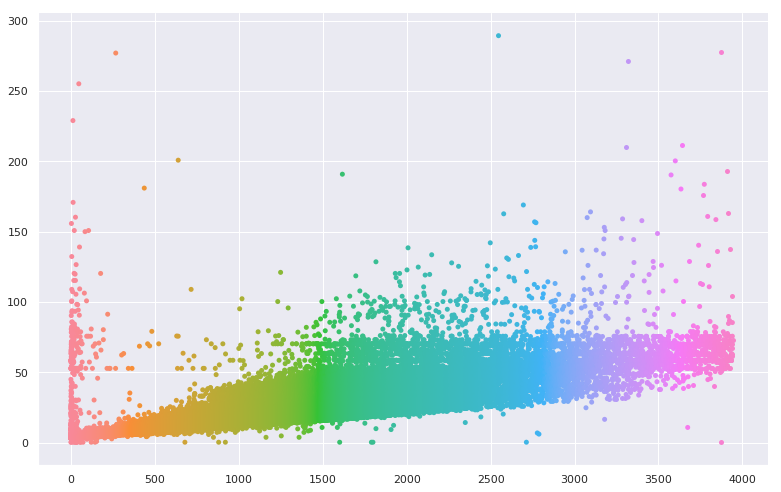

In [0]:
plot_cat("travel_time","total_amount","travel_time vs. total_amount")

No handles with labels found to put in legend.


<Figure size 1440x576 with 0 Axes>

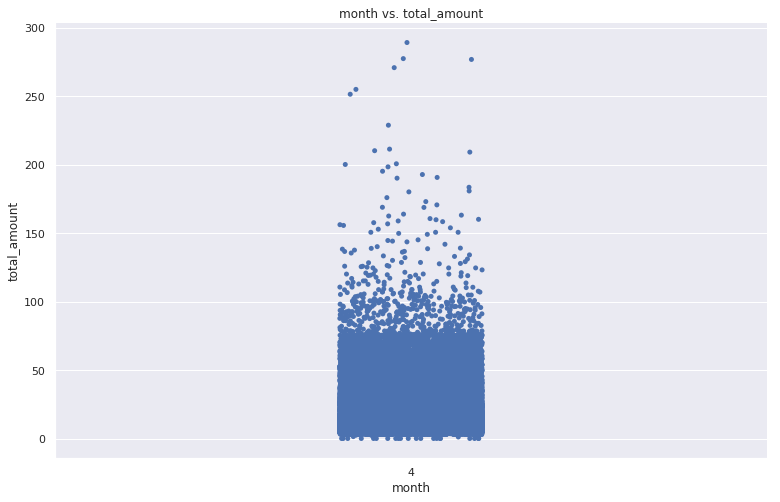

In [0]:
plot_cat("month","total_amount","month vs. total_amount")

In [0]:
## a single data point is available i.e. month 4 so no use of using it
df = df.drop("month",axis=1)

No handles with labels found to put in legend.


<Figure size 1440x576 with 0 Axes>

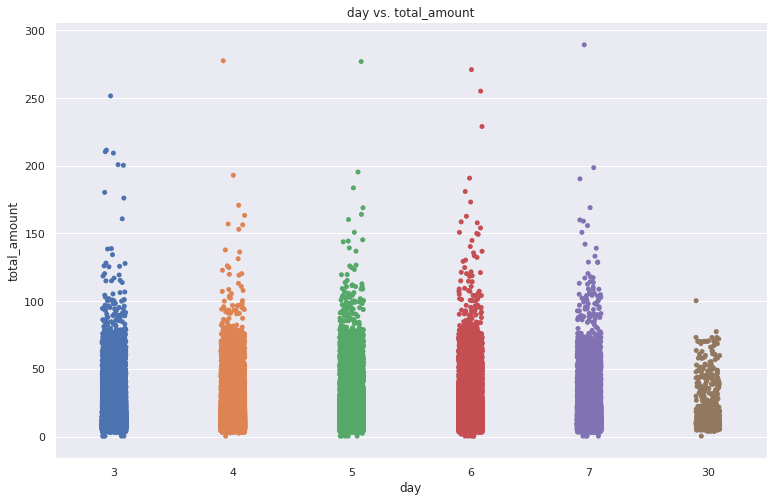

In [0]:
plot_cat("day","total_amount","day vs. total_amount")

No handles with labels found to put in legend.


<Figure size 1440x576 with 0 Axes>

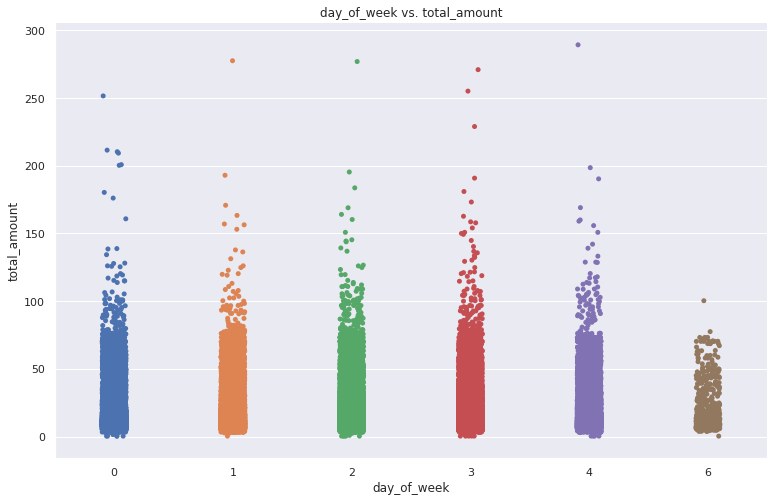

In [0]:
plot_cat("day_of_week","total_amount","day_of_week vs. total_amount")

No handles with labels found to put in legend.


<Figure size 1440x576 with 0 Axes>

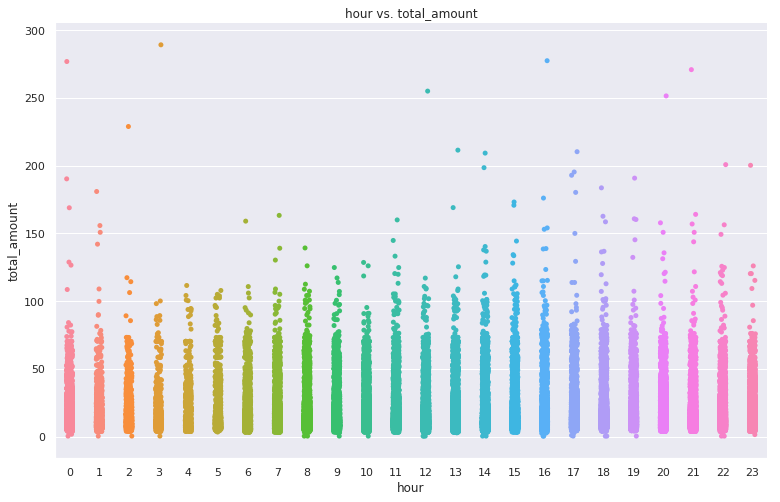

In [0]:
plot_cat("hour","total_amount","hour vs. total_amount")

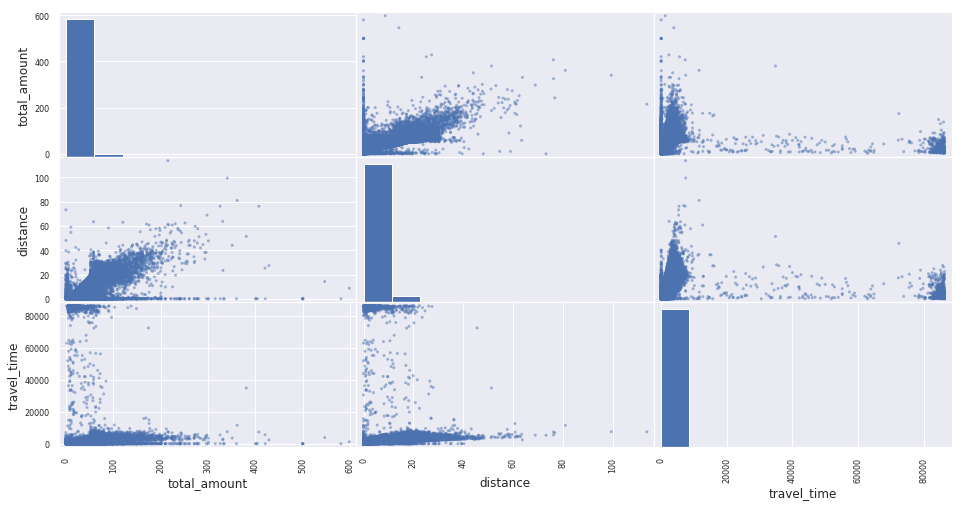

In [19]:
pd.plotting.scatter_matrix(frame = df[['total_amount', 'distance', 'travel_time']], figsize=(16,8));

Splitting the data for training and testing.

In [20]:
X = df.drop(['total_amount','ID','pickup_time','drop_time' ], axis=1)
y = df['total_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)



print("Train dataset size: ", X_train.shape[0])
print("Test size: ", X_test.shape[0])

Train dataset size:  628702
Test size:  419136


Function for finding results of a model.

In [0]:
def model_results(X_train, y_train, X_test, y_test, model):
    """Print model parameters of RMSE and R-square on training and testing sets.
    """
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("----Training Data results----")
    print("RMSE: ${:.1f}".format(mean_squared_error(y_train, y_train_pred)**0.5))
    print("R2: {:.2f}\n".format(r2_score(y_train, y_train_pred)))    
    print("----Test Data results----")
    print("RMSE: ${:.1f}".format(mean_squared_error(y_test, y_test_pred)**0.5))
    print("R2: {:.2f}\n".format(r2_score(y_test, y_test_pred)))

Creating a naive model of Linear Regression.

In [22]:
from sklearn.linear_model import LinearRegression


lm = LinearRegression().fit(X_train,y_train)

model_results(X_train, y_train, X_test, y_test, lm)

----Training Data results----
RMSE: $4.2
R2: 0.91

----Test Data results----
RMSE: $4.5
R2: 0.90



In [0]:
from sklearn.svm import SVR


reg = SVR().fit(X_train,y_train)
model_results(X_train, y_train, X_test, y_test, reg)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# New Section

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = df.drop(['total_amount','ID','pickup_time','drop_time' ], axis=1)
y = df['total_amount']

sc.fit(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-4, -0.5, 30)

las_cv = LassoCV(cv = 5, alphas = alphas, max_iter = 10000, random_state = 42)
las_cv.fit(X_train,y_train)
model_results(X_train, y_train, X_test, y_test, las_cv)

----Training Data results----
RMSE: $4.3
R2: 0.91

----Test Data results----
RMSE: $4.3
R2: 0.91



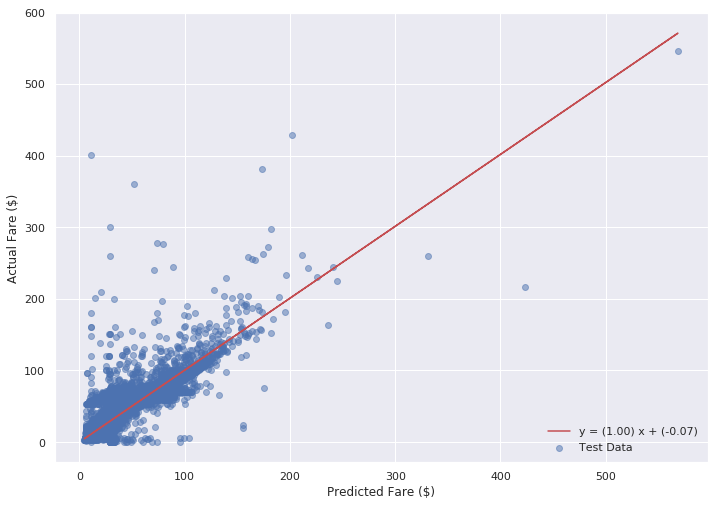

In [27]:
y_train_pred = las_cv.predict(X_train)
y_test_pred = las_cv.predict(X_test)
test_data_fit = LinearRegression().fit(y_test_pred.reshape(-1, 1),y_test)
slope = test_data_fit.coef_[0]
intercept = test_data_fit.intercept_
line = slope * y_test_pred + intercept

plt.scatter(y_test_pred, y_test, alpha = 0.5, label = 'Test Data ')
plt.plot(y_test_pred, line, 'r', label='y = ({:.2f}) x + ({:.2f})'.format(slope,intercept))
plt.legend(loc = 'lower right')
plt.xlabel('Predicted Fare ($)')
plt.ylabel('Actual Fare ($)');

In [0]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor


def rfr_model(X, y):# Perform Grid-Search
  gsc = GridSearchCV(estimator=RandomForestRegressor(),
        param_grid={
          'max_depth': range(10,21),
          'n_estimators': (10, 20),
        },
  cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)
  grid_result = gsc.fit(X, y)
  best_params = grid_result.best_params_
  print(best_params)
  rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)# Perform K-Fold CV
  scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')
  return [scores,best_params]

In [0]:
c = rfr_model(X,y)
print(c)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'max_depth': 19, 'n_estimators': 20}


In [28]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 20, max_depth = 19, n_jobs = -1).fit(X_train,y_train)

model_results(X_train, y_train, X_test, y_test, rfr)

----Training Data results----
RMSE: $1.1
R2: 0.99

----Test Data results----
RMSE: $2.5
R2: 0.97



**removing attributes which were visualized to be redundant like vendor id etc.**

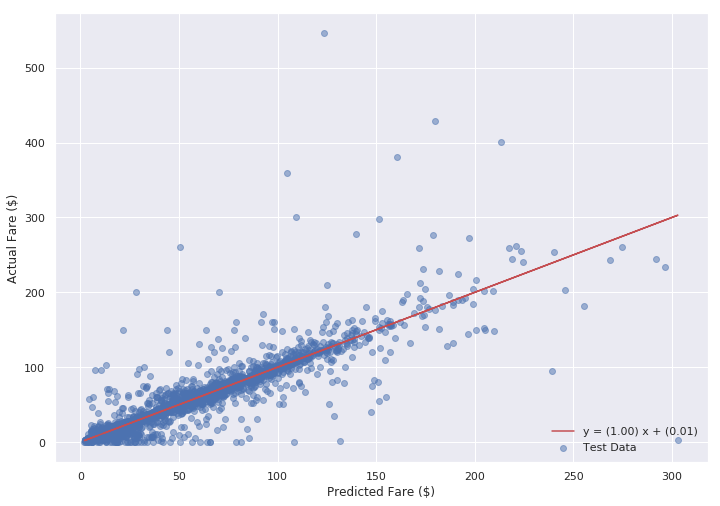

In [29]:
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)
test_data_fit = LinearRegression().fit(y_test_pred.reshape(-1, 1),y_test)
slope = test_data_fit.coef_[0]
intercept = test_data_fit.intercept_
line = slope * y_test_pred + intercept

plt.scatter(y_test_pred, y_test, alpha = 0.5, label = 'Test Data ')
plt.plot(y_test_pred, line, 'r', label='y = ({:.2f}) x + ({:.2f})'.format(slope,intercept))
plt.legend(loc = 'lower right')
plt.xlabel('Predicted Fare ($)')
plt.ylabel('Actual Fare ($)');

In [0]:
X = df.drop(['total_amount','ID','pickup_time','drop_time','vendor_id','improvement_charge' ], axis=1)
y = df['total_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



print("Train dataset size: ", X_train.shape[0])
print("Test size: ", X_test.shape[0])


from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train,y_train)
model_results(X_train, y_train, X_test, y_test, lm)

Train dataset size:  838270
Test size:  209568
----Training Data results----
RMSE: $4.3
R2: 0.91

----Test Data results----
RMSE: $4.3
R2: 0.91



In [0]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 20, max_depth = 19, n_jobs = -1).fit(X_train,y_train)

model_results(X_train, y_train, X_test, y_test, rfr)

----Training Data results----
RMSE: $1.1
R2: 0.99

----Test Data results----
RMSE: $2.5
R2: 0.97



In [0]:
rurl='https://raw.githubusercontent.com/roopbiswas/chh-ola/master/test.csv?token=AIEZ6SEU2V7VXHP3E5HCDZ25RA24A'
res=pd.read_csv(rurl,encoding='utf7')
res['stored_flag'] = res['stored_flag'].apply(lambda x: 0 if x=='N' else 1)

res['pickup_time'] = pd.to_datetime(res['pickup_time'])
res['drop_time'] = pd.to_datetime(res['drop_time'])

res['day_of_week'] = res['pickup_time'].dt.dayofweek
res['hour'] = res['pickup_time'].dt.hour
res['day'] = res['pickup_time'].dt.day
res['travel_time'] = [ z.total_seconds() for z in (res['drop_time'] - res['pickup_time'])]

In [0]:
df['vendor_id'] = df['vendor_id'].astype(int)
df['pickup_loc'] = df['pickup_loc'].astype(float)
df['hour'] = df['hour'].astype(float)
res['day_of_week'] = res['day_of_week'].astype(int)
res['stored_flag'] = res['stored_flag'].astype(int)

In [0]:
res.dtypes

ID                             int64
vendor_id                      int64
pickup_loc                   float64
drop_loc                     float64
driver_tip                   float64
mta_tax                      float64
distance                     float64
pickup_time           datetime64[ns]
drop_time             datetime64[ns]
num_passengers               float64
toll_amount                  float64
payment_method               float64
rate_code                    float64
stored_flag                    int64
extra_charges                float64
improvement_charge           float64
day_of_week                    int64
hour                           int64
day                            int64
travel_time                  float64
dtype: object

In [0]:
df.dtypes

ID                             int64
vendor_id                      int64
pickup_loc                   float64
drop_loc                     float64
driver_tip                   float64
mta_tax                      float64
distance                     float64
pickup_time           datetime64[ns]
drop_time             datetime64[ns]
num_passengers               float64
toll_amount                  float64
payment_method               float64
rate_code                    float64
stored_flag                    int64
extra_charges                float64
improvement_charge           float64
total_amount                 float64
day_of_week                    int64
hour                         float64
travel_time                  float64
day                            int64
dtype: object

In [0]:
X = df.drop(['total_amount','ID','pickup_time','drop_time' ], axis=1)
y = df['total_amount']
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 20, max_depth = 19, n_jobs = -1).fit(X,y)

In [0]:
X_test = res.drop([ 'ID','pickup_time','drop_time' ], axis=1)
X_test.info()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154235 entries, 0 to 154234
Data columns (total 17 columns):
vendor_id             154235 non-null int64
pickup_loc            154235 non-null float64
drop_loc              154235 non-null float64
driver_tip            154235 non-null float64
mta_tax               154235 non-null float64
distance              154235 non-null float64
num_passengers        154235 non-null float64
toll_amount           154235 non-null float64
payment_method        154235 non-null float64
rate_code             154235 non-null float64
stored_flag           154235 non-null int64
extra_charges         154235 non-null float64
improvement_charge    154235 non-null float64
day_of_week           154235 non-null int64
hour                  154235 non-null int64
day                   154235 non-null int64
travel_time           154235 non-null float64
dtypes: float64(12), int64(5)
memory usage: 20.0 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047838 entries

In [0]:
y_test_pred = rfr.predict(X_test)

In [0]:
y_test_pred

array([ 6.72395841,  7.76163349, 15.28576136, ...,  9.20811789,
       12.47093873, 11.59874815])

In [0]:
sub = pd.DataFrame(columns=['ID','total_amount'])

In [0]:
sub['ID'] = res['ID']
sub['total_amount'] = y_test_pred
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154235 entries, 0 to 154234
Data columns (total 2 columns):
ID              154235 non-null int64
total_amount    154235 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.4 MB


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive

/content/gdrive


In [0]:
cd My Drive

/content/gdrive/My Drive


In [0]:
sub.to_csv('submission_chhola.csv',index=False)

In [0]:
X = df.drop(['total_amount','ID','pickup_time','drop_time','vendor_id','improvement_charge' ], axis=1)
y = df['total_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



print("Train dataset size: ", X_train.shape[0])
print("Test size: ", X_test.shape[0])


In [0]:
X = df.drop(['total_amount','ID','pickup_time','drop_time' ], axis=1)
y = df['total_amount']
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor(alpha=0.12,max_depth=4,random_state=42).fit(X_train,y_train)
model_results(X_train, y_train, X_test, y_test, gbr)


ValueError: ignored